In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

dataset_dir = Path('UCI HAR Dataset')

# Loading Data

## Total Body acceleration

In [2]:
train_total_acc_x = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_total_acc_y = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_total_acc_z = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_total_acc_x = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_total_acc_y = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_total_acc_z = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [3]:
train_total_acc_x.shape

(7352, 128)

In [4]:
test_total_acc_x.shape

(2947, 128)

## Estimated Body acceleration

In [5]:
train_body_acc_x = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_body_acc_y = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_body_acc_z = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_body_acc_x = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_body_acc_y = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_body_acc_z = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [6]:
train_body_acc_x.shape

(7352, 128)

In [7]:
test_body_acc_x.shape

(2947, 128)

## Triaxial Angular velocity from the gyroscope

In [8]:
train_gyro_x = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_gyro_y = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_gyro_z = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_gyro_x = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_gyro_y = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_gyro_z = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [9]:
train_gyro_x.shape

(7352, 128)

In [10]:
test_gyro_x.shape

(2947, 128)

## Engineered features

In [11]:
train_eng = pd.read_csv(dataset_dir/'train/X_train.txt', 
                        header=None, delim_whitespace=True).values

test_eng = pd.read_csv(dataset_dir/'test/X_test.txt', 
                       header=None, delim_whitespace=True).values

In [12]:
train_eng.shape

(7352, 561)

In [13]:
test_eng.shape

(2947, 561)

## Subjects

In [14]:
train_subjects = pd.read_csv(dataset_dir/'train/subject_train.txt', delim_whitespace=True, header=None).values

train_subjects.shape

(7352, 1)

In [15]:
test_subjects = pd.read_csv(dataset_dir/'test/subject_test.txt', delim_whitespace=True, header=None).values

test_subjects.shape

(2947, 1)

## Labels

There are 6 types os activites to be recognized in the dataset:

1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

In [16]:
train_labels = pd.read_csv(dataset_dir/'train/y_train.txt', delim_whitespace=True, header=None).values

train_labels.shape

(7352, 1)

In [17]:
test_labels = pd.read_csv(dataset_dir/'test/y_test.txt', delim_whitespace=True, header=None).values

test_labels.shape

(2947, 1)

# 2. Data transformation

The sampled signals will be transformed to a 2D matrix where each column represents a different feature and each row represents the subsequent timestep value of each feature. So, the final array will have indexes representing [sample, timestep, feature].

In [18]:
def group_signals(signals_list):
    signals_set = list()
    for signal in signals_list:
        signals_set.append(signal)
    signals_set = np.dstack(signals_set)
    return signals_set

In [19]:
train_signals = [train_total_acc_x, train_total_acc_y, train_total_acc_z,
                 train_body_acc_x, train_body_acc_y, train_body_acc_z,
                 train_gyro_x, train_gyro_y, train_gyro_z]

train_set_signals = group_signals(train_signals)
train_set_signals.shape

(7352, 128, 9)

In [20]:
test_signals = [test_total_acc_x, test_total_acc_y, test_total_acc_z,
                 test_body_acc_x, test_body_acc_y, test_body_acc_z,
                 test_gyro_x, test_gyro_y, test_gyro_z]
test_set_signals = group_signals(test_signals)
test_set_signals.shape

(2947, 128, 9)

# 3. Model training

## 3.1. Model 1: WiSARD

This model uses Thermometer encoding and the enginnered features to make the prediction.

In [36]:
from thermometer_encoder import ThermometerEncoder
import wisardpkg as wp
from time import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import pickle

def cross_validation_model1(X, y, n_splits=5, addressSize=[50], thermometer_size=[5], bleachingActivated=[True], 
                            thermometer_columns=None):
    grid_search_results = []
    best_params = None
    best_accuracy = -1
    
    if not thermometer_columns:
        thermometer_columns = list(range(X.shape[1]))
    
    param_grid_dict = dict()
    param_grid_dict['thermometer_size'] = thermometer_size
    param_grid_dict['addressSize'] = addressSize
    param_grid_dict['bleachingActivated'] = bleachingActivated
    
    skf = StratifiedKFold(n_splits=n_splits)
    
    param_grid = ParameterGrid(param_grid_dict)
    
    param_grid_combinations = len(list(param_grid))
    n_combs = n_splits * param_grid_combinations
    progress = tqdm(total=n_combs, position=0, leave=True)
    
    for params in param_grid:
        print(params)
        training_time = []
        training_prediction_time = []
        validation_prediction_time = []
        thermometer_time = []
        training_accuracy = []
        validation_accuracy = []
        for train_index, val_index in skf.split(X, y):
            X_train = X[train_index, :]
            y_train = y[train_index]
            y_train_str = [str(l) for l in y_train]
            
            X_val = X[val_index, :]
            y_val = y[val_index]
            y_val_str = [str(l) for l in y_val]
            
            model = wp.Wisard(params['addressSize'], bleachingActivated=params['bleachingActivated'])
            thermometer = ThermometerEncoder(thermometer_columns, n_bits=params['thermometer_size'])
            
            start = time()
            X_train = thermometer.fit_transform(X_train).astype(int).tolist()
            X_val = thermometer.transform(X_val).astype(int).tolist()
            end = time()
            thermometer_time.append(end-start)
            
            start = time()
            model.train(X_train, y_train_str)
            end = time()
            training_time.append(end-start)
            
            start = time()
            pred_train = model.classify(X_train)
            end = time()
            training_prediction_time.append(end-start)
            
            start = time()
            pred_val = model.classify(X_val)
            end = time()
            validation_prediction_time.append(end-start)
            
            training_accuracy.append(accuracy_score(y_train_str, pred_train))
            
            validation_accuracy.append(accuracy_score(y_val_str, pred_val))
            
            progress.update()
        
        cv_result = {'training_time_mean': np.mean(training_time),
                     'training_time_std': np.std(training_time),
                     'training_prediction_time_mean': np.mean(training_prediction_time),
                     'training_prediction_time_std': np.std(training_prediction_time),
                     'validation_prediction_time_mean': np.mean(validation_prediction_time),
                     'validation_prediction_time_std': np.std(validation_prediction_time),
                     'thermometer_time_mean': np.mean(thermometer_time),
                     'thermometer_time_std': np.std(thermometer_time),
                     'training_accuracy_mean': np.mean(training_accuracy),
                     'training_accuracy_std': np.std(training_accuracy),
                     'validation_accuracy_mean': np.mean(validation_accuracy),
                     'validation_accuracy_std': np.std(validation_accuracy)}
        
        cv_result = {**params, **cv_result}
        
        grid_search_results.append(cv_result)
        
        if (cv_result['validation_accuracy_mean'] > best_accuracy):
            best_accuracy = cv_result['validation_accuracy_mean']
            best_params = params
        
        print(f"Train acc. mean: {cv_result['training_accuracy_mean']:.4f} | Validation acc. mean: {cv_result['validation_accuracy_mean']:.4f}\n")
    
    grid_search_results = pd.DataFrame(grid_search_results)
    grid_search_results['rank'] = grid_search_results['validation_accuracy_mean'].rank(ascending=False)
    
    return grid_search_results, best_params

In [31]:
gs_model1, best_params_model1 = cross_validation_model1(train_eng, train_labels, n_splits=5, addressSize=[10, 20, 30, 40, 50], 
                                                        thermometer_size=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                                                        bleachingActivated=[True, False], thermometer_columns=None)

  0%|          | 0/600 [00:00<?, ?it/s]

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 4}


  1%|          | 5/600 [02:43<5:28:07, 33.09s/it]

Train acc. mean: 0.9194 | Validation acc. mean: 0.7961

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 5}


  2%|▏         | 10/600 [05:38<5:16:43, 32.21s/it]

Train acc. mean: 0.9343 | Validation acc. mean: 0.8152

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 6}


  2%|▎         | 15/600 [08:14<4:57:59, 30.56s/it]

Train acc. mean: 0.9328 | Validation acc. mean: 0.8045

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 7}


  3%|▎         | 20/600 [11:02<5:21:40, 33.28s/it]

Train acc. mean: 0.9432 | Validation acc. mean: 0.8225

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 8}


  4%|▍         | 25/600 [15:00<7:12:44, 45.15s/it]

Train acc. mean: 0.9451 | Validation acc. mean: 0.8254

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 9}


  5%|▌         | 30/600 [18:46<6:58:14, 44.02s/it]

Train acc. mean: 0.9549 | Validation acc. mean: 0.8339

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 10}


  6%|▌         | 35/600 [22:43<7:25:40, 47.33s/it]

Train acc. mean: 0.9563 | Validation acc. mean: 0.8343

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 11}


  7%|▋         | 40/600 [27:00<7:53:12, 50.70s/it]

Train acc. mean: 0.9531 | Validation acc. mean: 0.8341

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 12}


  8%|▊         | 45/600 [31:36<8:24:38, 54.56s/it]

Train acc. mean: 0.9542 | Validation acc. mean: 0.8368

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 13}


  8%|▊         | 50/600 [36:46<9:12:05, 60.23s/it]

Train acc. mean: 0.9595 | Validation acc. mean: 0.8339

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 14}


  9%|▉         | 55/600 [42:12<9:44:39, 64.37s/it]

Train acc. mean: 0.9665 | Validation acc. mean: 0.8406

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 15}


 10%|█         | 60/600 [48:07<10:22:14, 69.14s/it]

Train acc. mean: 0.9629 | Validation acc. mean: 0.8385

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 4}


 11%|█         | 65/600 [49:39<4:01:09, 27.05s/it] 

Train acc. mean: 0.8792 | Validation acc. mean: 0.7754

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 5}


 12%|█▏        | 70/600 [51:35<3:29:51, 23.76s/it]

Train acc. mean: 0.9104 | Validation acc. mean: 0.8013

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 6}


 12%|█▎        | 75/600 [53:57<3:59:50, 27.41s/it]

Train acc. mean: 0.9226 | Validation acc. mean: 0.8078

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 7}


 13%|█▎        | 80/600 [56:39<4:33:31, 31.56s/it]

Train acc. mean: 0.9349 | Validation acc. mean: 0.8290

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 8}


 14%|█▍        | 85/600 [59:40<5:03:42, 35.38s/it]

Train acc. mean: 0.9348 | Validation acc. mean: 0.8092

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 9}


 15%|█▌        | 90/600 [1:03:13<5:54:41, 41.73s/it]

Train acc. mean: 0.9393 | Validation acc. mean: 0.8225

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 10}


 16%|█▌        | 95/600 [1:07:02<6:20:57, 45.26s/it]

Train acc. mean: 0.9443 | Validation acc. mean: 0.8292

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 11}


 17%|█▋        | 100/600 [1:11:18<6:59:45, 50.37s/it]

Train acc. mean: 0.9460 | Validation acc. mean: 0.8385

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 12}


 18%|█▊        | 105/600 [1:16:07<7:39:16, 55.67s/it]

Train acc. mean: 0.9502 | Validation acc. mean: 0.8305

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 13}


 18%|█▊        | 110/600 [1:21:08<8:05:48, 59.49s/it]

Train acc. mean: 0.9541 | Validation acc. mean: 0.8388

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 14}


 19%|█▉        | 115/600 [1:26:33<8:36:14, 63.86s/it]

Train acc. mean: 0.9560 | Validation acc. mean: 0.8407

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 15}


 20%|██        | 120/600 [1:32:18<9:05:43, 68.22s/it]

Train acc. mean: 0.9592 | Validation acc. mean: 0.8396

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 4}


 21%|██        | 125/600 [1:33:52<3:30:54, 26.64s/it]

Train acc. mean: 0.9520 | Validation acc. mean: 0.8180

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 5}


 22%|██▏       | 130/600 [1:35:46<3:03:52, 23.47s/it]

Train acc. mean: 0.9603 | Validation acc. mean: 0.8334

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 6}


 22%|██▎       | 135/600 [1:38:01<3:24:37, 26.40s/it]

Train acc. mean: 0.9595 | Validation acc. mean: 0.8298

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 7}


 23%|██▎       | 140/600 [1:40:40<3:57:56, 31.04s/it]

Train acc. mean: 0.9645 | Validation acc. mean: 0.8440

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 8}


 24%|██▍       | 145/600 [1:43:45<4:33:24, 36.05s/it]

Train acc. mean: 0.9702 | Validation acc. mean: 0.8451

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 9}


 25%|██▌       | 150/600 [1:47:09<5:00:10, 40.02s/it]

Train acc. mean: 0.9714 | Validation acc. mean: 0.8554

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 10}


 26%|██▌       | 155/600 [1:50:54<5:27:38, 44.18s/it]

Train acc. mean: 0.9752 | Validation acc. mean: 0.8511

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 11}


 27%|██▋       | 160/600 [1:55:07<6:00:30, 49.16s/it]

Train acc. mean: 0.9775 | Validation acc. mean: 0.8536

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 12}


 28%|██▊       | 165/600 [1:59:35<6:22:54, 52.82s/it]

Train acc. mean: 0.9807 | Validation acc. mean: 0.8619

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 13}


 28%|██▊       | 170/600 [2:04:34<6:59:47, 58.58s/it]

Train acc. mean: 0.9825 | Validation acc. mean: 0.8550

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 14}


 29%|██▉       | 175/600 [2:09:52<7:23:22, 62.59s/it]

Train acc. mean: 0.9837 | Validation acc. mean: 0.8573

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 15}


 30%|███       | 180/600 [2:15:40<7:56:51, 68.12s/it]

Train acc. mean: 0.9842 | Validation acc. mean: 0.8617

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 4}


 31%|███       | 185/600 [2:17:09<3:01:52, 26.29s/it]

Train acc. mean: 0.9403 | Validation acc. mean: 0.8166

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 5}


 32%|███▏      | 190/600 [2:19:03<2:39:10, 23.29s/it]

Train acc. mean: 0.9604 | Validation acc. mean: 0.8301

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 6}


 32%|███▎      | 195/600 [2:21:18<2:58:58, 26.52s/it]

Train acc. mean: 0.9570 | Validation acc. mean: 0.8301

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 7}


 33%|███▎      | 200/600 [2:24:02<3:30:51, 31.63s/it]

Train acc. mean: 0.9661 | Validation acc. mean: 0.8399

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 8}


 34%|███▍      | 205/600 [2:26:58<3:48:02, 34.64s/it]

Train acc. mean: 0.9670 | Validation acc. mean: 0.8481

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 9}


 35%|███▌      | 210/600 [2:30:23<4:18:56, 39.84s/it]

Train acc. mean: 0.9693 | Validation acc. mean: 0.8520

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 10}


 36%|███▌      | 215/600 [2:34:11<4:46:08, 44.59s/it]

Train acc. mean: 0.9733 | Validation acc. mean: 0.8546

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 11}


 37%|███▋      | 220/600 [2:38:20<5:09:42, 48.90s/it]

Train acc. mean: 0.9734 | Validation acc. mean: 0.8494

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 12}


 38%|███▊      | 225/600 [2:42:57<5:45:40, 55.31s/it]

Train acc. mean: 0.9795 | Validation acc. mean: 0.8477

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 13}


 38%|███▊      | 230/600 [2:47:51<5:59:45, 58.34s/it]

Train acc. mean: 0.9792 | Validation acc. mean: 0.8583

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 14}


 39%|███▉      | 235/600 [2:53:10<6:25:39, 63.40s/it]

Train acc. mean: 0.9835 | Validation acc. mean: 0.8532

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 15}


 40%|████      | 240/600 [2:59:19<7:11:46, 71.96s/it]

Train acc. mean: 0.9828 | Validation acc. mean: 0.8618

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 4}


 41%|████      | 245/600 [3:00:48<2:39:47, 27.01s/it]

Train acc. mean: 0.9709 | Validation acc. mean: 0.8436

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 5}


 42%|████▏     | 250/600 [3:02:45<2:22:44, 24.47s/it]

Train acc. mean: 0.9768 | Validation acc. mean: 0.8432

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 6}


 42%|████▎     | 255/600 [3:04:58<2:31:25, 26.34s/it]

Train acc. mean: 0.9802 | Validation acc. mean: 0.8466

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 7}


 43%|████▎     | 260/600 [3:07:37<2:54:04, 30.72s/it]

Train acc. mean: 0.9851 | Validation acc. mean: 0.8483

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 8}


 44%|████▍     | 265/600 [3:10:32<3:11:48, 34.35s/it]

Train acc. mean: 0.9880 | Validation acc. mean: 0.8590

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 9}


 45%|████▌     | 270/600 [3:14:04<3:43:52, 40.71s/it]

Train acc. mean: 0.9888 | Validation acc. mean: 0.8624

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 10}


 46%|████▌     | 275/600 [3:17:49<4:00:00, 44.31s/it]

Train acc. mean: 0.9899 | Validation acc. mean: 0.8572

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 11}


 47%|████▋     | 280/600 [3:21:59<4:20:57, 48.93s/it]

Train acc. mean: 0.9922 | Validation acc. mean: 0.8602

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 12}


 48%|████▊     | 285/600 [3:26:31<4:39:10, 53.18s/it]

Train acc. mean: 0.9920 | Validation acc. mean: 0.8682

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 13}


 48%|████▊     | 290/600 [3:31:26<4:59:37, 57.99s/it]

Train acc. mean: 0.9937 | Validation acc. mean: 0.8672

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 14}


 49%|████▉     | 295/600 [3:36:44<5:16:20, 62.23s/it]

Train acc. mean: 0.9946 | Validation acc. mean: 0.8690

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 15}


 50%|█████     | 300/600 [3:42:28<5:40:47, 68.16s/it]

Train acc. mean: 0.9956 | Validation acc. mean: 0.8716

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 4}


 51%|█████     | 305/600 [3:44:01<2:10:48, 26.61s/it]

Train acc. mean: 0.9609 | Validation acc. mean: 0.8186

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 5}


 52%|█████▏    | 310/600 [3:45:54<1:52:06, 23.19s/it]

Train acc. mean: 0.9785 | Validation acc. mean: 0.8439

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 6}


 52%|█████▎    | 315/600 [3:48:08<2:04:28, 26.21s/it]

Train acc. mean: 0.9768 | Validation acc. mean: 0.8392

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 7}


 53%|█████▎    | 320/600 [3:50:46<2:23:19, 30.71s/it]

Train acc. mean: 0.9839 | Validation acc. mean: 0.8596

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 8}


 54%|█████▍    | 325/600 [3:53:44<2:39:44, 34.85s/it]

Train acc. mean: 0.9877 | Validation acc. mean: 0.8628

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 9}


 55%|█████▌    | 330/600 [3:57:07<2:58:01, 39.56s/it]

Train acc. mean: 0.9881 | Validation acc. mean: 0.8517

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 10}


 56%|█████▌    | 335/600 [4:00:50<3:13:23, 43.79s/it]

Train acc. mean: 0.9905 | Validation acc. mean: 0.8626

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 11}


 57%|█████▋    | 340/600 [4:05:01<3:31:46, 48.87s/it]

Train acc. mean: 0.9902 | Validation acc. mean: 0.8581

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 12}


 57%|█████▊    | 345/600 [4:09:29<3:44:53, 52.92s/it]

Train acc. mean: 0.9914 | Validation acc. mean: 0.8686

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 13}


 58%|█████▊    | 350/600 [4:14:32<4:06:42, 59.21s/it]

Train acc. mean: 0.9943 | Validation acc. mean: 0.8594

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 14}


 59%|█████▉    | 355/600 [4:19:45<4:13:17, 62.03s/it]

Train acc. mean: 0.9933 | Validation acc. mean: 0.8696

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 15}


 60%|██████    | 360/600 [4:25:26<4:28:03, 67.01s/it]

Train acc. mean: 0.9951 | Validation acc. mean: 0.8724

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 4}


 61%|██████    | 365/600 [4:26:55<1:42:24, 26.15s/it]

Train acc. mean: 0.9861 | Validation acc. mean: 0.8445

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 5}


 62%|██████▏   | 370/600 [4:28:47<1:28:28, 23.08s/it]

Train acc. mean: 0.9898 | Validation acc. mean: 0.8498

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 6}


 62%|██████▎   | 375/600 [4:31:02<1:38:34, 26.28s/it]

Train acc. mean: 0.9925 | Validation acc. mean: 0.8500

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 7}


 63%|██████▎   | 380/600 [4:33:43<1:54:31, 31.23s/it]

Train acc. mean: 0.9940 | Validation acc. mean: 0.8595

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 8}


 64%|██████▍   | 385/600 [4:36:38<2:02:57, 34.31s/it]

Train acc. mean: 0.9960 | Validation acc. mean: 0.8587

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 9}


 65%|██████▌   | 390/600 [4:40:01<2:18:23, 39.54s/it]

Train acc. mean: 0.9968 | Validation acc. mean: 0.8708

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 10}


 66%|██████▌   | 395/600 [4:43:52<2:35:19, 45.46s/it]

Train acc. mean: 0.9966 | Validation acc. mean: 0.8663

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 11}


 67%|██████▋   | 400/600 [4:48:00<2:43:00, 48.90s/it]

Train acc. mean: 0.9978 | Validation acc. mean: 0.8658

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 12}


 68%|██████▊   | 405/600 [4:52:29<2:53:28, 53.38s/it]

Train acc. mean: 0.9984 | Validation acc. mean: 0.8770

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 13}


 68%|██████▊   | 410/600 [4:57:23<3:02:52, 57.75s/it]

Train acc. mean: 0.9986 | Validation acc. mean: 0.8739

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 14}


 69%|██████▉   | 415/600 [5:02:40<3:14:02, 62.93s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8751

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 15}


 70%|███████   | 420/600 [5:08:17<3:19:45, 66.59s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8779

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 4}


 71%|███████   | 425/600 [5:09:46<1:15:58, 26.05s/it]

Train acc. mean: 0.9844 | Validation acc. mean: 0.8422

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 5}


 72%|███████▏  | 430/600 [5:11:39<1:05:46, 23.22s/it]

Train acc. mean: 0.9902 | Validation acc. mean: 0.8531

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 6}


 72%|███████▎  | 435/600 [5:14:03<1:14:45, 27.18s/it]

Train acc. mean: 0.9905 | Validation acc. mean: 0.8526

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 7}


 73%|███████▎  | 440/600 [5:16:40<1:22:01, 30.76s/it]

Train acc. mean: 0.9944 | Validation acc. mean: 0.8709

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 8}


 74%|███████▍  | 445/600 [5:19:35<1:28:35, 34.29s/it]

Train acc. mean: 0.9951 | Validation acc. mean: 0.8602

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 9}


 75%|███████▌  | 450/600 [5:23:03<1:41:56, 40.77s/it]

Train acc. mean: 0.9957 | Validation acc. mean: 0.8698

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 10}


 76%|███████▌  | 455/600 [5:26:46<1:46:24, 44.03s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8682

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 11}


 77%|███████▋  | 460/600 [5:30:54<1:53:26, 48.62s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8689

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 12}


 78%|███████▊  | 465/600 [5:35:24<1:58:54, 52.85s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8663

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 13}


 78%|███████▊  | 470/600 [5:40:17<2:05:00, 57.70s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8693

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 14}


 79%|███████▉  | 475/600 [5:45:38<2:10:42, 62.74s/it]

Train acc. mean: 0.9989 | Validation acc. mean: 0.8740

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 15}


 80%|████████  | 480/600 [5:51:15<2:13:17, 66.65s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8738

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 4}


 81%|████████  | 485/600 [5:52:47<51:47, 27.03s/it]  

Train acc. mean: 0.9943 | Validation acc. mean: 0.8459

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 5}


 82%|████████▏ | 490/600 [5:54:39<42:19, 23.08s/it]

Train acc. mean: 0.9961 | Validation acc. mean: 0.8566

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 6}


 82%|████████▎ | 495/600 [5:56:51<45:15, 25.86s/it]

Train acc. mean: 0.9975 | Validation acc. mean: 0.8554

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 7}


 83%|████████▎ | 500/600 [5:59:28<50:44, 30.44s/it]

Train acc. mean: 0.9987 | Validation acc. mean: 0.8689

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 8}


 84%|████████▍ | 505/600 [6:02:23<54:41, 34.54s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8649

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 9}


 85%|████████▌ | 510/600 [6:05:48<59:46, 39.85s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8652

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 10}


 86%|████████▌ | 515/600 [6:09:31<1:02:04, 43.82s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8702

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 11}


 87%|████████▋ | 520/600 [6:13:47<1:06:52, 50.16s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8662

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 12}


 88%|████████▊ | 525/600 [6:18:12<1:05:36, 52.48s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8704

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 13}


 88%|████████▊ | 530/600 [6:23:08<1:08:16, 58.53s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8749

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 14}


 89%|████████▉ | 535/600 [6:28:19<1:06:50, 61.70s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8707

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 15}


 90%|█████████ | 540/600 [6:33:59<1:06:59, 66.99s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8751

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 4}


 91%|█████████ | 545/600 [6:35:27<23:46, 25.94s/it]  

Train acc. mean: 0.9913 | Validation acc. mean: 0.8307

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 5}


 92%|█████████▏| 550/600 [6:37:18<19:05, 22.91s/it]

Train acc. mean: 0.9959 | Validation acc. mean: 0.8444

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 6}


 92%|█████████▎| 555/600 [6:39:30<19:27, 25.94s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8508

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 7}


 93%|█████████▎| 560/600 [6:42:07<20:24, 30.62s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8629

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 8}


 94%|█████████▍| 565/600 [6:45:08<20:11, 34.60s/it]

Train acc. mean: 0.9986 | Validation acc. mean: 0.8606

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 9}


 95%|█████████▌| 570/600 [6:48:29<19:36, 39.22s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8719

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 10}


 96%|█████████▌| 575/600 [6:52:11<18:09, 43.56s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8697

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 11}


 97%|█████████▋| 580/600 [6:56:21<16:07, 48.36s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8719

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 12}


 98%|█████████▊| 585/600 [7:00:44<12:57, 51.84s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8675

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 13}


 98%|█████████▊| 590/600 [7:05:38<09:34, 57.42s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8776

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 14}


 99%|█████████▉| 595/600 [7:10:49<05:06, 61.40s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8785

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 15}


100%|██████████| 600/600 [7:16:31<00:00, 66.71s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8754



In [33]:
best_params_model1

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 14}

In [37]:
gs_model1 = gs_model1.sort_values('rank').reset_index(drop=True)

with open('results/model1_gs_results.pickle', 'wb') as file:
    pickle.dump(gs_model1, file)

gs_model1

,addressSize,bleachingActivated,thermometer_size,training_time_mean,training_time_std,training_prediction_time_mean,training_prediction_time_std,validation_prediction_time_mean,validation_prediction_time_std,thermometer_time_mean,thermometer_time_std,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std,rank
0,50,False,14,1.050038,0.100483,1.903664,0.107853,0.456213,0.036972,58.300183,0.414570,0.999864,0.000167,0.878538,0.020922,1.0
1,40,True,15,1.155015,0.142177,2.150205,0.087930,0.532353,0.067464,63.016580,0.343022,0.999014,0.000622,0.877860,0.021933,2.0
2,50,False,13,0.937289,0.039164,1.784808,0.125505,0.402436,0.041004,55.275979,1.661058,0.999626,0.000272,0.877587,0.020783,3.0
3,40,True,12,0.957398,0.140268,1.841147,0.225698,0.447434,0.092126,50.234657,0.790068,0.998436,0.000542,0.877042,0.021262,4.0
4,50,False,15,1.101405,0.091224,2.082378,0.122678,0.465581,0.016437,64.311114,3.366207,0.999796,0.000068,0.875410,0.022517,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,False,6,0.513411,0.074930,1.416754,0.224947,0.334889,0.049020,25.804531,0.997018,0.922572,0.004139,0.807810,0.023743,116.0
116,10,True,6,0.617270,0.283715,2.077487,0.666521,0.498939,0.180973,27.451635,2.912010,0.932773,0.004127,0.804545,0.033746,117.0
117,10,False,5,0.364300,0.034734,1.082309,0.083240,0.251343,0.011373,21.075563,0.124358,0.910432,0.015458,0.801282,0.031013,118.0
118,10,True,4,0.699621,0.119526,2.991878,0.238535,0.698589,0.106812,27.613680,1.154062,0.919410,0.011350,0.796112,0.031776,119.0


In [ ]:
with open('results/model1_gs_results.pickle', 'rb') as file:
    gs_model1 = pickle.load(file)

In [41]:
# Preprocessing train_eng, train_labels
y_train_str = [str(l) for l in train_labels]
y_test_str = [str(l) for l in test_labels]

model = wp.Wisard(best_params_model1['addressSize'], bleachingActivated=best_params_model1['bleachingActivated'])
thermometer_columns = list(range(train_eng.shape[1]))
thermometer = ThermometerEncoder(thermometer_columns, n_bits=best_params_model1['thermometer_size'])

X_train = thermometer.fit_transform(train_eng).astype(int).tolist()
X_test = thermometer.transform(test_eng).astype(int).tolist()

# training
model.train(X_train, y_train_str)

pred_train = model.classify(X_train)
pred_test = model.classify(X_test)

training_accuracy = accuracy_score(y_train_str, pred_train)
test_accuracy = accuracy_score(y_test_str, pred_test)

print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9993
Test Accuracy: 0.8924


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, display_labels=None, normalize='true'):
    if display_labels is None:
        display_labels = np.unique(y_true)
            
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(xticks_rotation=90)
    disp.ax_.grid(False)

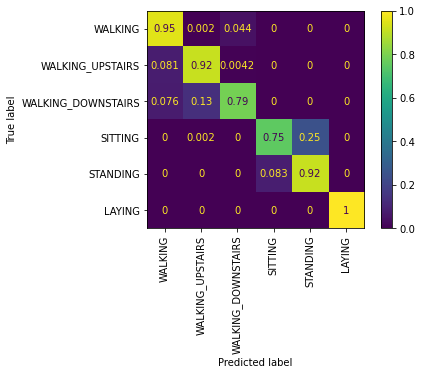

In [60]:
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
display_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                  'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(y_test_str, pred_test, display_labels=display_labels)